In [1]:
#################################################################################
# This tuitoral performs basic data processing and data analysis for dataset using seurat
# refer to https://satijalab.org/seurat/ Vignette "Guided tutorial"
# Please modify this script to apply for specific dataset.
# Usage: Rscript HCA-d_data_processing_seurat.r datasetName dataFormat
# Usage example: Rscript HCA-d_data_processing_seurat.r spleen_spleen_Madissoon2019 10X
#################################################################################

# args = argsCommand(true)
# datasetName = args[1]
# #datasetName value: organ_tissue_authorYear without space
# dataFormat = args[2]
# #dataFormat value: tsv (tab separated), 10X (sparse)

datasetName = 'Blood_Blood_HCLCord-Blood2'
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/data1/ljq/jupyter_code/bhyhcad/bhyhcad/hcl_all/Blood_Blood_HCLCord-Blood2")
library(Seurat)
library(data.table)
library(ggplot2)
#library(flexclust)
#install.packages('flexclust')

# setwd("/path/to/dataset/")
# library(Seurat)
# library(data.table)
# library(ggplot2)
# library(flexclust)
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"), h = T, row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation_hcad.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation_hcad.tsv"), h = T, sep = "\t", row.names = 1)
}
# Extract demo data for test
#data.matrix <- data.matrix[,1:500]
#data.metadata <- data.metadata[1:500,]
#data.annotation <- data.annotation[1:500,,drop=FALSE]

# Pre-processing
min.cells = 3
min.features = 100
nFeature_RNA_range = c(20, 1000)
percent.mt.thre = 10

# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation_hcad.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}
# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

# 2. run sctransform 
#dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj) 
dev.off()

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Centering and scaling data matrix

PC_ 1 
Positive:  RPS18, RPS29, RPS3A, RPS6, RPS27, RPL13, RPS19, RPL13A, RPL10, RPS27A 
	   RPL34, RPS3, RPL31, RPS14, RPL32, RPS12, RPL7, EEF1A1, RPL27A, RPS25 
	   RPL21, RPS15A, RPS23, RPL37A, RPS16, RPL11, RPLP1, RPS15, RPL30, RPL19 
Negative:  S100A8, S100A9, CAMP, LCN2, PGLYRP1, RETN, LTF, OLFM4, S100P, ANXA3 
	   CD24, CEACAM8, CHI3L1, BPI, MMP8, TCN1, CRISP3, HP, DEFA3, S100A12 
	   ALOX5AP, CYSTM1, GCA, ORM1, MS4A3, NKG7, APMAP, ARG1, CD177, RGL4 
PC_ 2 
Positive:  FTL, FTH1, CST3, HLA-DRA, SAT1, CD74, HLA-DRB1, S100A6, G0S2, HLA-DPA1 
	   CPVL, B2M, HLA-DQB1, ID2, HLA-DPB1, LGALS2, PLAUR, RGS2, HLA-B, HLA-DRB6 
	   NAPSB, TMSB10, IFITM3, PLEK, CXCL8, TNFRSF1B, TMEM176B, FCGR3A, LINC01272, GPR183 
Negative:  DEFA3, AZU1, DEFA4, MPO, ELANE, MS4A3, BPI, NUCB2, CD24, RNASE3 
	   CTSG, PRTN3, CST7, RNASE2, CEACAM6, SLPI, DEFA8P, NKG7, CEACAM8, DPY19L1P1 


png 
  2

In [2]:
data.annotation2

,cell_ontology_class
,<fct>
CordBlood_1.AAAACGAACGCCAGGACT,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Granulocyte macrophage progenitor/GMP-(Leukopoiesis)-MonocyteCD14
CordBlood_1.AAAACGAGGGTCGTCCCG,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Macrophage dendritic cell progenitor-Common dendritic cell precursor-Pre conventional dendritic cell-Conventional dendritic cellFCER1A CD1C CST3
CordBlood_1.AAAACGATGGCGAGATGG,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Megakaryocyte erythrocyte progenitor/MEP-(Erythropoiesis)-Proerythroblast-Basophilic erythroblast-Polychromatophilic erythroblast-Orthochromatophilic erythroblast/normoblast-Reticulocyte-ErythrocyteCD233
CordBlood_1.AAAACGCAAAGTCCATCT,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Megakaryocyte erythrocyte progenitor/MEP-(Erythropoiesis)-Proerythroblast-Basophilic erythroblast-Polychromatophilic erythroblast-Orthochromatophilic erythroblast/normoblast-Reticulocyte-ErythrocyteCD233
CordBlood_1.AAAACGCTCGCAGTCGGT,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Granulocyte macrophage progenitor/GMP-(Leukopoiesis)-Myeloblast-Promyelocyte-Neutrophilic myelocyte-Neutrophilic metamyelocyte-NeutrophilCD66b
CordBlood_1.AAAACGGCAGGACGCTTG,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Granulocyte macrophage progenitor/GMP-(Leukopoiesis)-Myeloblast-Promyelocyte-Neutrophilic myelocyte-Neutrophilic metamyelocyte-NeutrophilCD66b
CordBlood_1.AAAACGGCAGGAGGACAT,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Granulocyte macrophage progenitor/GMP-(Leukopoiesis)-MonocyteCD14
CordBlood_1.AAAACGGCGTCCACGTTG,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common lymphoid progenitor/CLP-(B cell line)-B cell (Centrocyte)-CD79A CD79B
CordBlood_1.AAAACGGGGTTTTGCGGA,Blood-Blood-Hemopoietic stem cell-Multipotent progenitor/MPP-Common myeloid progenitor/CMP or common granulocyte/megakaryocyte/erythrocyte progenitor/CFU-GEMM-Granulocyte macrophage progenitor/GMP-(Leukopoiesis)-MonocyteCD14


In [2]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 1.8, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4432
Number of edges: 223204

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6772
Number of communities: 17
Elapsed time: 0 seconds


In [3]:
# Visulize the clustering result
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
22:56:31 UMAP embedding parameters a = 0.9922 b = 1.112

22:56:31 Read 4432 rows and found 30 numeric columns

22:56:31 Using Annoy for neighbor search, n_neighbors = 30

22:56:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

22:56:32 Writing NN index file to temp file /tmp/RtmpTzk62j/file643b3b248e99

22:56:32 Searching Annoy index using 1 thread, search_k = 3000

22:56:33 Annoy recall = 100%

22:56:33 Commencing smooth kNN distance calibration using 1 thread

22:56:33 Initializing fr

In [5]:
new.cluster.ids<-c('Blood-Connective Tissue-Monocyte-CD14','Blood-Connective Tissue-Monocyte-CD14','Blood-Connective Tissue-Monocyte-CD14','Blood-Connective Tissue-T cell-CD3D','Blood-Connective Tissue-Monocyte-CD14','Blood-Connective Tissue-Neutrophil-CD177','Blood-Connective Tissue-Hemopoietic stem cell-CD99','Blood-Connective Tissue-Neutrophil-CD24','Blood-Connective Tissue-Monocyte-FCN1','Blood-Connective Tissue-Neutrophil-CD24','Blood-Connective Tissue-Plasma B Cell-CD79A','Blood-Connective Tissue-Conventional dendritic cell-CD74','Blood-Connective Tissue-Neutrophil-CD177','Blood-Connective Tissue-Megakaryocyte-GP9','Blood-Connective Tissue-NK cell-NKG7','Blood-Connective Tissue-Plasma B Cell-JCHAIN','Blood-Connective Tissue-Erythrocyte-AHSP')

In [7]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
hcad.label = Idents(dataobj)
dataobj <- AddMetaData(dataobj, metadata = hcad.label,col.name = 'hcad.label')

In [42]:
Idents(dataobj)

CordBlood_2.AAAACGAAAACGAATAAA1 CordBlood_2.AAAACGACGAGCGGCTGC1 
                              9                               6 
CordBlood_2.AAAACGACTTATACACCC2 CordBlood_2.AAAACGAGGGTCAACGCC2 
                              2                               1 
CordBlood_2.AAAACGATTCCAGCTGTG2 CordBlood_2.AAAACGGAACGCTACTTC1 
                              0                               8 
CordBlood_2.AAAACGGCCTAGCCAGAC1 CordBlood_2.AAAACGGGCTGCACCTGA1 
                              0                               5 
CordBlood_2.AAAACGGGGCGAGCCCTC2 CordBlood_2.AAAACGTAAGGGAGATGG1 
                              8                              10 
CordBlood_2.AAAACGTATGTATTGGAC1 CordBlood_2.AAAACGTGAAGCCTGTGT2 
                             10                               5 
CordBlood_2.AAAACGTGATCAAGTCGT1 CordBlood_2.AAAACGTTGGACTATTGT2 
                              4                              14 
CordBlood_2.AAAGTTAACGCCCATGAT1 CordBlood_2.AAAGTTAAGTACAACGCC2 
                              9                               3 
CordBlood_2.AAAGTTAAGTACTTCCGC2 CordBlood_2.AAAGTTAATAAAAGTTTA1 
                              0                               2 
CordBlood_2.AAAGTTAGCGAGCAAAGT1 CordBlood_2.AAAGTTCAACAAAAAACG2 
                              9                               5 
CordBlood_2.AAAGTTCGGCAGTAGCAT2 CordBlood_2.AAAGTTGAATTAGCGTCC1 
                              0                               0 
CordBlood_2.AAAGTTGCAGGAATGGCG1 CordBlood_2.AAAGTTGCGTCCGTCCCG1 
                              7                              14 
CordBlood_2.AAAGTTGCTCAAATCAAC2 CordBlood_2.AAAGTTGGGCGAGCCCTC1 
                              0                               2 
CordBlood_2.AAAGTTGGTACAAGATGG1 CordBlood_2.AAAGTTTAGTCGCGTATT1 
                              6                               6 
CordBlood_2.AACCTAAAAGTTAGTTTA1 CordBlood_2.AACCTAAAAGTTGGGTTT1 
                              1                               8 
CordBlood_2.AACCTAAACCTAATTTGC1 CordBlood_2.AACCTAAACGCCAGATGG1 
                              4                               2 
CordBlood_2.AACCTAAACGCCATTCCA2 CordBlood_2.AACCTAAACGCCGGTACA2 
                              4                               3 
CordBlood_2.AACCTAAACGCCTCAAAG1 CordBlood_2.AACCTAAAGCGGGATCTT2 
                              4                               4 
CordBlood_2.AACCTAAAGTACTTCATA2 CordBlood_2.AACCTAAATAAACCGCTA2 
                              3                               8 
CordBlood_2.AACCTAAATAAAGCAGGA2 CordBlood_2.AACCTAACAATATGCAAT1 
                              6                               4 
CordBlood_2.AACCTAACACCCTTCATA1 CordBlood_2.AACCTAACCTGAAGGGTC1 
                              2                               1 
CordBlood_2.AACCTAACCTGAATCAAC2 CordBlood_2.AACCTAACCTGAGGCTGC2 
                              1                               3 
CordBlood_2.AACCTAACGAGCAAAACG2 CordBlood_2.AACCTAACGAGCGCTGTG2 
                              3                               0 
CordBlood_2.AACCTAACGTTGCCATCT2 CordBlood_2.AACCTAACGTTGGGCTGC2 
                              0                               8 
CordBlood_2.AACCTAACTTATACAATA1 CordBlood_2.AACCTAACTTATAGGGTC2 
                              3                               7 
CordBlood_2.AACCTAACTTATGCCCTC2 CordBlood_2.AACCTAACTTATTCAAAG1 
                              4                               3 
CordBlood_2.AACCTAACTTATTTCATA2 CordBlood_2.AACCTAAGATGGAAAGTT1 
                              8                               3 
CordBlood_2.AACCTAAGATGGCATCCC2 CordBlood_2.AACCTAAGATGGGCTCAA1 
                              3                               4 
CordBlood_2.AACCTAAGATGGTATTGT1 CordBlood_2.AACCTAAGGACTGCGAAT2 
                              5                               4 
CordBlood_2.AACCTAAGGACTGGCTGC1 CordBlood_2.AACCTAAGGACTTATGTA2 
                              2                               1 
CordBlood_2.AACCTAAGGACTTCAAAG2 CordBlood_2.AACCTAAGGGTCAGATGG2 
                              4    

In [30]:
dataobj$celltype = Idents(dataobj)

In [33]:
dataobj

An object of class Seurat 
13539 features across 4432 samples within 1 assay 
Active assay: RNA (13539 features)
 2 dimensional reductions calculated: pca, umap

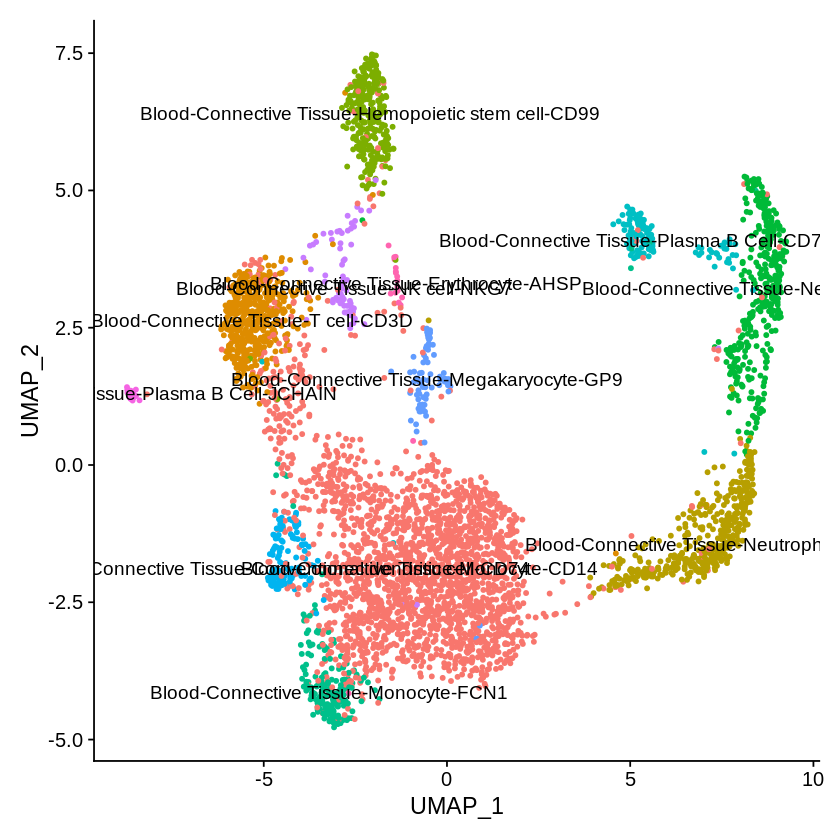

In [8]:
DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)+NoLegend()

In [47]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap, width = 8, height = 5)

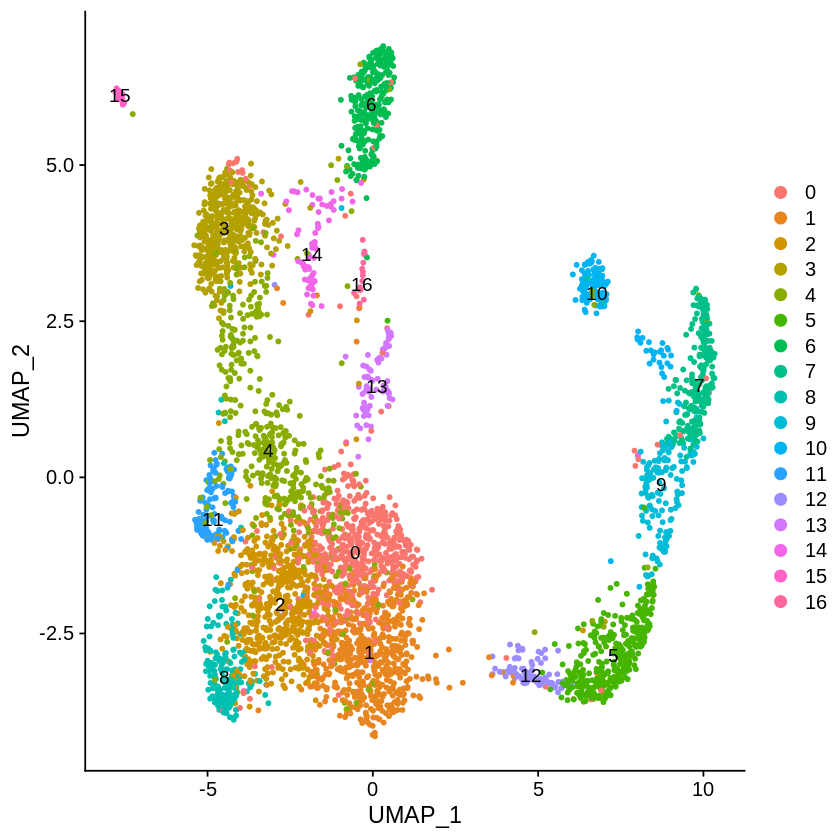

In [32]:
p_umap

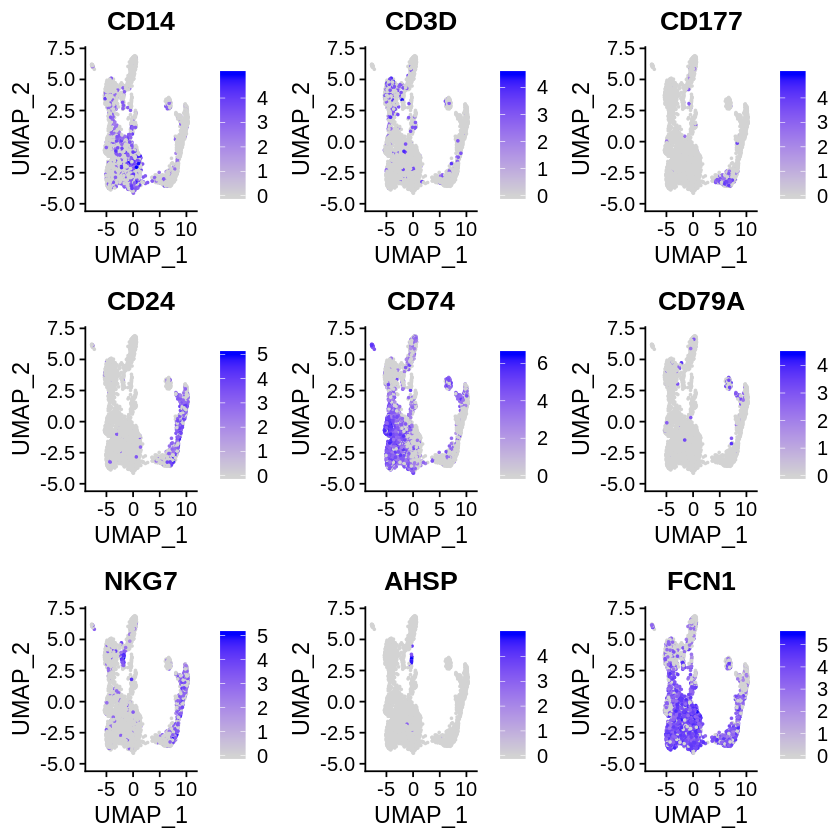

In [20]:
FeaturePlot(dataobj,features = c('CD14','CD3D','CD177','CD24','CD74','CD79A','NKG7','AHSP','FCN1'))

In [25]:
dataobj

An object of class Seurat 
13539 features across 4432 samples within 1 assay 
Active assay: RNA (13539 features)
 2 dimensional reductions calculated: pca, umap

In [8]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cluster.ids", pt.size=1)

ERROR: Error in `[[.Seurat`(object, group.by): Cannot find 'cluster.ids' in this Seurat object


In [9]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height =5)

In [8]:
dataobj[['RNA']]@counts[1:5,1:5]

ERROR: Error in eval(expr, envir, enclos): object 'dataobj' not found


In [ ]:
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

In [ ]:
ElbowPlot(dataobj)

In [15]:
# Compare the seurat clusters with original clusters
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

ERROR: Error in randIndex(dataobj$cell_cluster, dataobj$seurat_clusters): could not find function "randIndex"


In [7]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height =5)
if (file.exists(paste0(datasetName,"_annotation_hcad.tsv"))) {
    p_umap3 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_ontology_class", pt.size=1)+NoLegend()
    ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap3, width = 8, height = 5)
}

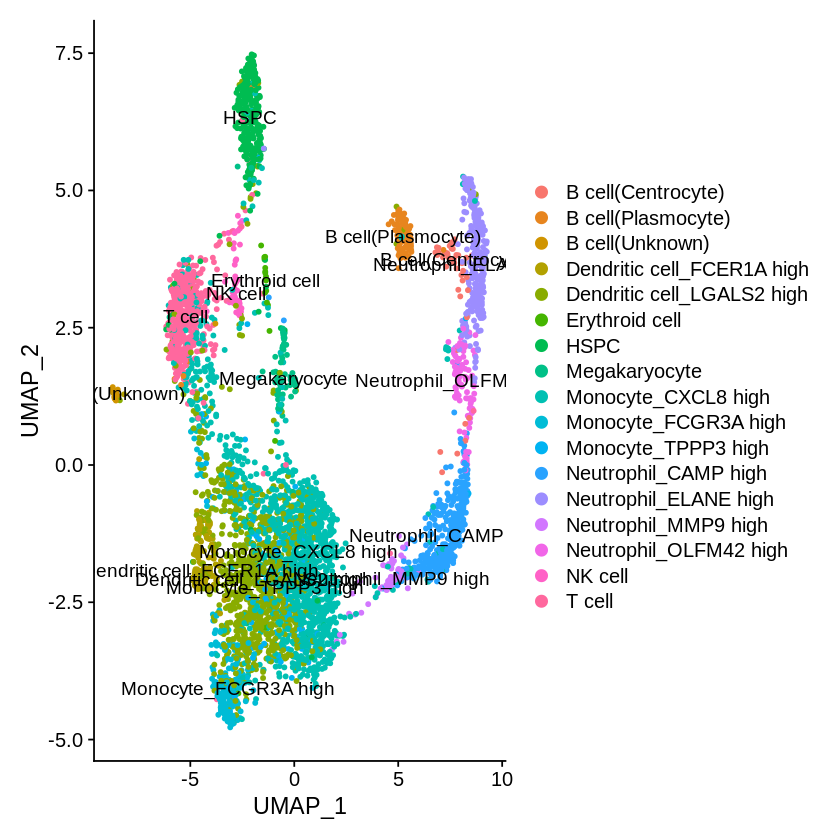

In [10]:
p_umap2

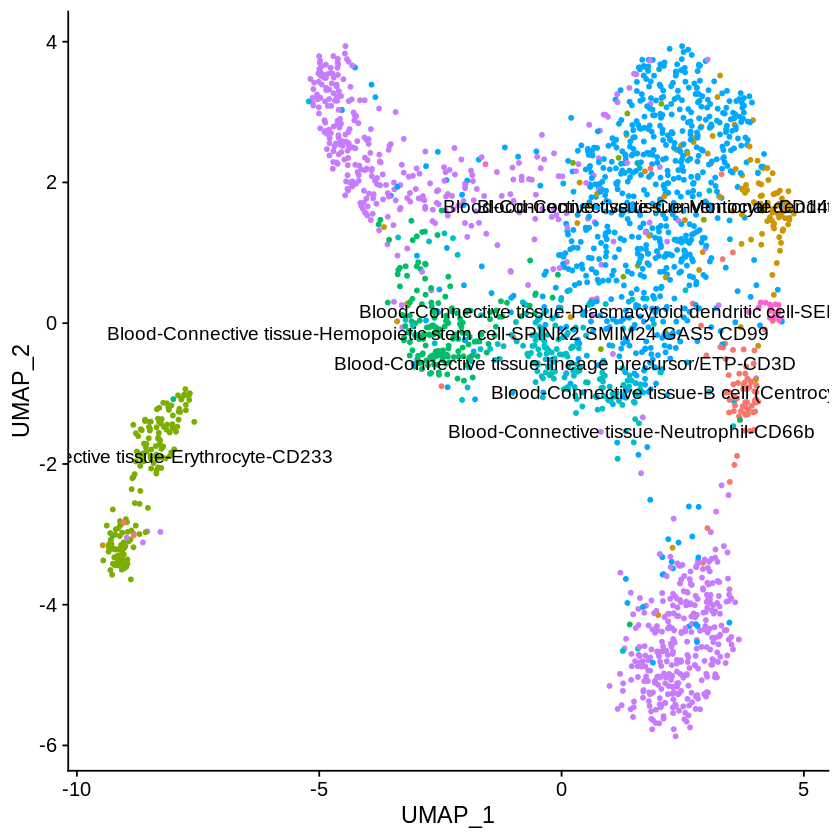

In [7]:
p_umap3

In [46]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster Blood-Connective Tissue-Monocyte-CD14
Calculating cluster Blood-Connective Tissue-T cell-CD3D
Calculating cluster Blood-Connective Tissue-Neutrophil-CD177
Calculating cluster Blood-Connective Tissue-Hemopoietic stem cell-CD99
Calculating cluster Blood-Connective Tissue-Neutrophil-CD24
Calculating cluster Blood-Connective Tissue-Monocyte-FCN1
Calculating cluster Blood-Connective Tissue-Plasma B Cell-CD79A
Calculating cluster Blood-Connective Tissue-Conventional dendritic cell-CD74
Calculating cluster Blood-Connective Tissue-Megakaryocyte-GP9
Calculating cluster Blood-Connective Tissue-NK cell-NKG7
Calculating cluster Blood-Connective Tissue-Plasma B Cell-JCHAIN
Calculating cluster Blood-Connective Tissue-Erythrocyte-AHSP


In [45]:
write.table(Idents(dataobj), file = paste0(datasetName,".seurat.annotation_hcad.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

In [11]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))